In [48]:
import sys
from io import StringIO
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn')

In [74]:
def load_input_data():
    """Loads data of all filled questionnairies."""
    df = pd.read_csv('./input/2020_opendatascience_poll_data.csv.gz', compression='gzip')
    df.columns = ['Timestamp', 'Country', 'Timezone', 'Education', 'Work status', 'Expertise', 'Age',
                  'Channel frequency satisfaction', 'Channel complexity satisfaction', 'Fields of interest',
                  'Source', 'Recommend chance', 'Score reason', 'Comment']
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    return df

df = load_input_data()

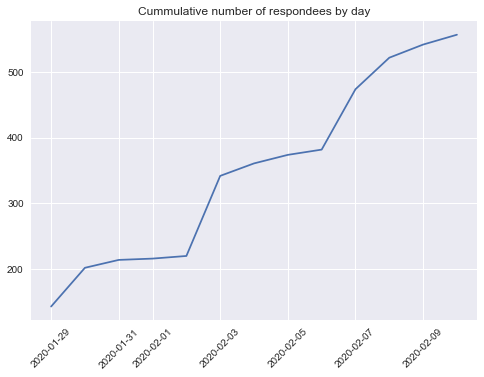

In [73]:
df['Timestamp'].dt.date.value_counts().sort_index().cumsum().plot()
plt.xticks(rotation=45);
plt.title('Cummulative number of respondees by day');

In [51]:
df.head()

,Timestamp,Country,Timezone,Education,Work status,Expertise,Age,Channel frequency satisfaction,Channel complexity satisfaction,Fields of interest,Source,Recommend chance,Score reason,Comment
0,2020-01-29 13:30:57-03:00,Ukraine,GMT+3,Undergrad,Student + part time remote job,Middle,18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,All stuff is absolutely brilliant! Thank you f...,NaN
1,2020-01-29 13:31:19-03:00,Russia,GMT+3,Graduate,Employed,Middle,31-42,"Nope, less frequent posting will be all right ...",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",4,it's ok,"post some jobs with salary ranges, especially ..."
2,2020-01-29 13:32:48-03:00,Ukraine,GMT+2,PhD,Unemployed,"Novice (Studying courses, active learning)",25-30,"Yes, it's about perfect",Need more specific and complicated materials,#WhereToStart #EntryLevel #Novice #MOOC #Learn...,Telegram channel search,3,NaN,NaN
3,2020-01-29 13:33:27-03:00,Italy,GMT+1,"No degree at all, still learning / self-taught",Student,"Novice (Studying courses, active learning)",18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,Mainly due to material shared,NaN
4,2020-01-29 13:33:49-03:00,Ukraine,GMT+2,Graduate,Employed,Middle,18-24,"Yes, it's about perfect",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",2,It's not super useful actually. Good enough to...,NaN


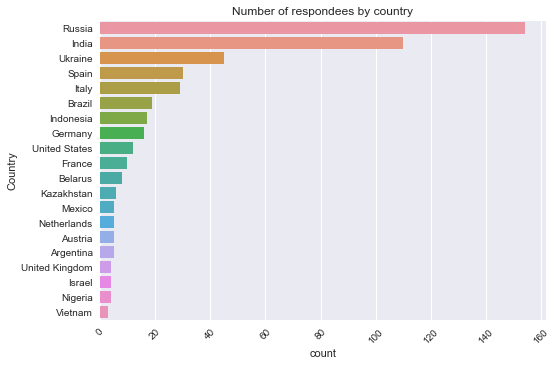

In [52]:
sns.countplot(y='Country', data=df, orient='h', order=df['Country'].value_counts().index[:20])
plt.xticks(rotation=45);
plt.title('Number of respondees by country');

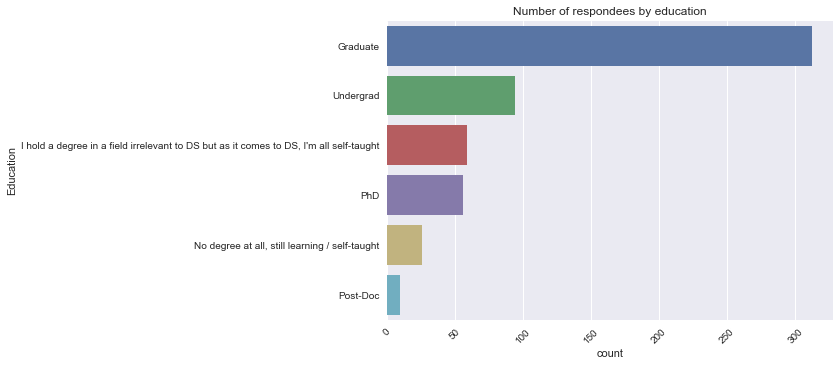

In [53]:
sns.countplot(y='Education', data=df, orient='h', order=df['Education'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by education');

In [54]:
pd.crosstab(df['Country'], df['Education'], normalize='index')

Education,Graduate,"I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught","No degree at all, still learning / self-taught",PhD,Post-Doc,Undergrad
Country,,,,,,
Argentina,0.600000,0.000000,0.200000,0.000000,0.000000,0.200000
Armenia,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Austria,0.200000,0.200000,0.000000,0.600000,0.000000,0.000000
Azerbaijan,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Belarus,0.750000,0.125000,0.000000,0.000000,0.000000,0.125000
Brazil,0.736842,0.052632,0.000000,0.052632,0.052632,0.105263
Cameroon,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Canada,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000


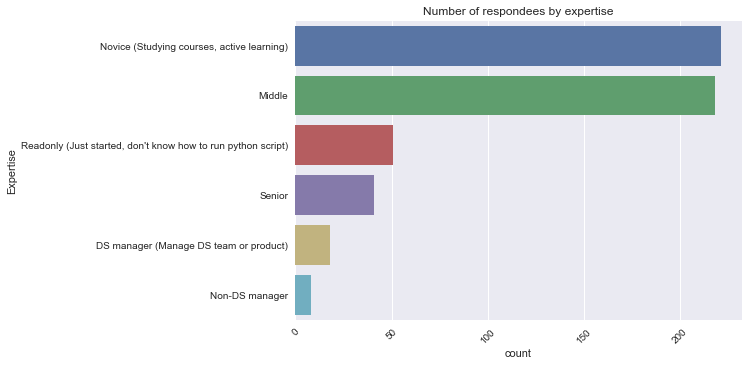

In [55]:
sns.countplot(y='Expertise', data=df, orient='h', order=df['Expertise'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by expertise');

In [56]:
pd.crosstab(df['Education'], df['Expertise']).style.background_gradient(cmap='viridis', low=.8, high=0.2)

Expertise,DS manager (Manage DS team or product),Middle,Non-DS manager,"Novice (Studying courses, active learning)","Readonly (Just started, don't know how to run python script)",Senior
Education,,,,,,
Graduate,7,141,2,107,31,24
"I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught",4,17,0,36,1,1
"No degree at all, still learning / self-taught",0,4,1,18,3,0
PhD,6,23,4,9,1,13
Post-Doc,1,4,0,3,0,2
Undergrad,0,29,1,48,15,1


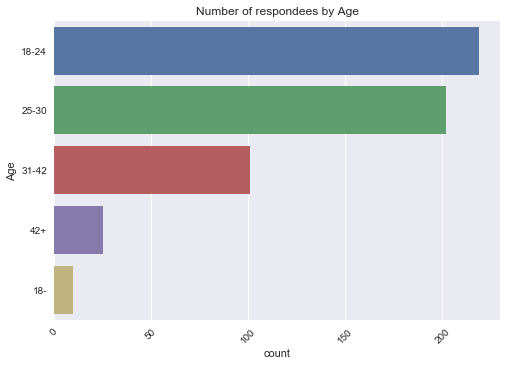

In [57]:
sns.countplot(y='Age', data=df, orient='h', order=df['Age'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Age');

In [58]:
pd.crosstab(df['Education'], df['Age']).style.background_gradient(cmap='viridis', low=.8, high=0.2)

Age,18-,18-24,25-30,31-42,42+
Education,,,,,
Graduate,1,100,141,55,15
"I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught",0,15,25,15,4
"No degree at all, still learning / self-taught",3,17,1,5,0
PhD,0,8,22,21,5
Post-Doc,0,1,4,4,1
Undergrad,6,78,9,1,0


In [59]:
pd.crosstab(df['Expertise'], df['Age']).style.background_gradient(cmap='viridis', low=.8, high=0.2)

Age,18-,18-24,25-30,31-42,42+
Expertise,,,,,
DS manager (Manage DS team or product),0,1,7,7,3
Middle,2,82,88,40,6
Non-DS manager,0,0,3,5,0
"Novice (Studying courses, active learning)",4,104,69,33,11
"Readonly (Just started, don't know how to run python script)",4,24,14,5,4
Senior,0,8,21,11,1


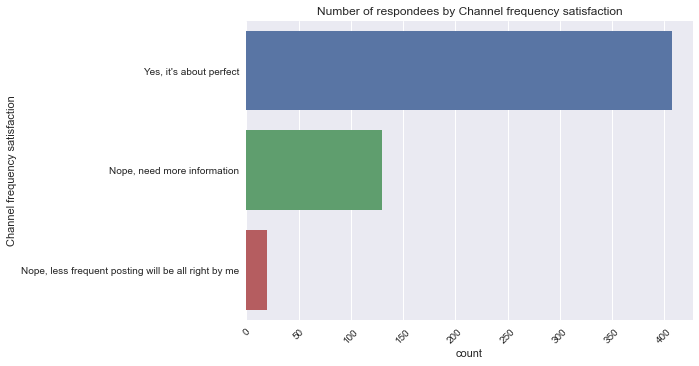

In [60]:
sns.countplot(y='Channel frequency satisfaction', data=df, orient='h', order=df['Channel frequency satisfaction'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Channel frequency satisfaction');

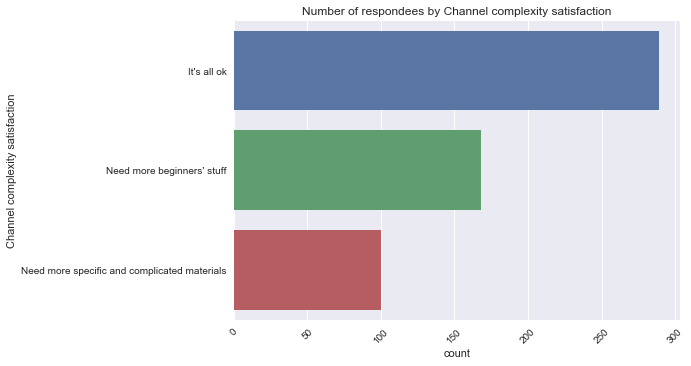

In [61]:
sns.countplot(y='Channel complexity satisfaction', data=df, orient='h', order=df['Channel complexity satisfaction'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Channel complexity satisfaction');

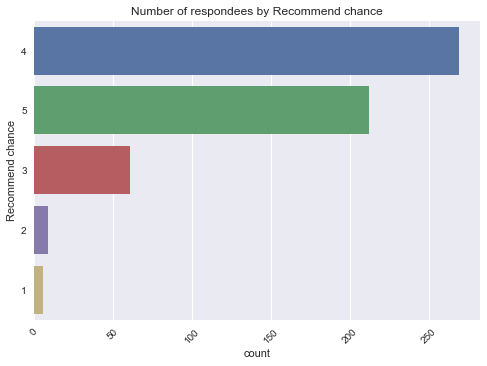

In [62]:
sns.countplot(y='Recommend chance', data=df, orient='h', order=df['Recommend chance'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Recommend chance');

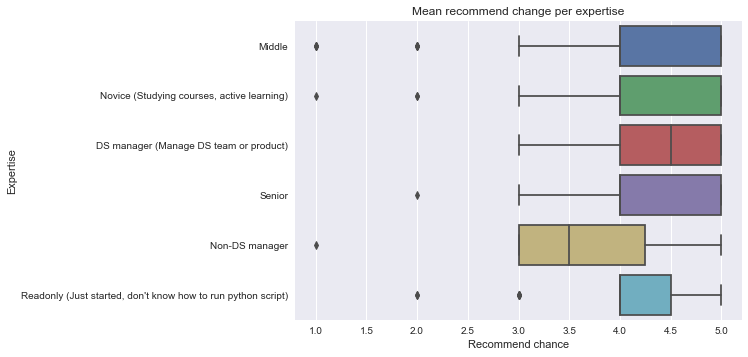

In [63]:
sns.boxplot(y='Expertise', x='Recommend chance', data=df, orient='h');
plt.title('Mean recommend change per expertise');

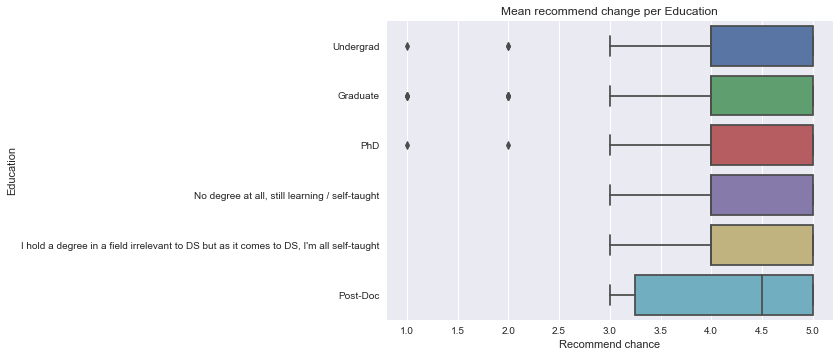

In [64]:
sns.boxplot(y='Education', x='Recommend chance', data=df, orient='h');
plt.title('Mean recommend change per Education');

/Users/kupa/Library/Caches/pypoetry/virtualenvs/ods-channel-stats-eda-5hJ1F2Av-py3.7/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/kupa/Library/Caches/pypoetry/virtualenvs/ods-channel-stats-eda-5hJ1F2Av-py3.7/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


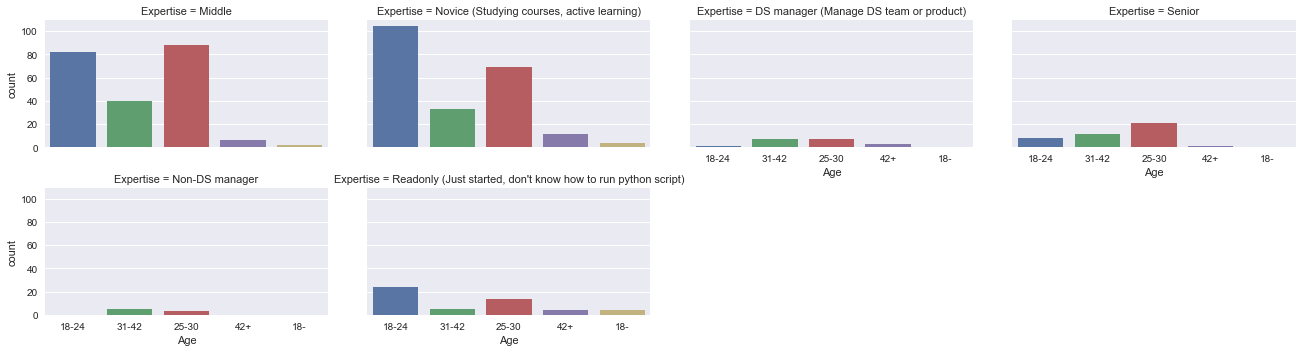

In [65]:
sns.factorplot("Age", col="Expertise",
               col_wrap=4, data=df,
               kind="count", size=2.5, aspect=1.8)

/Users/kupa/Library/Caches/pypoetry/virtualenvs/ods-channel-stats-eda-5hJ1F2Av-py3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


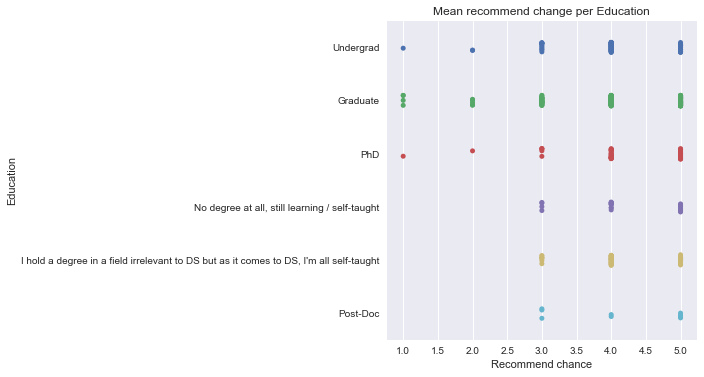

In [66]:
sns.catplot(y='Education', x='Recommend chance', data=df, orient='h');
plt.title('Mean recommend change per Education');

In [75]:
def display_wordcloud_image(text:str):
    """Function for displaying wordcloud of the provided text."""
    plt.figure(figsize = (12, 8))
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                          width=1200, height=1000).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

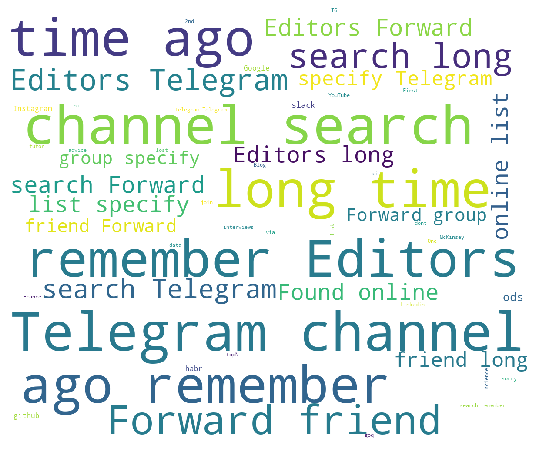

In [68]:
text = ' '.join(df['Source'].values)
display_wordcloud_image(text)

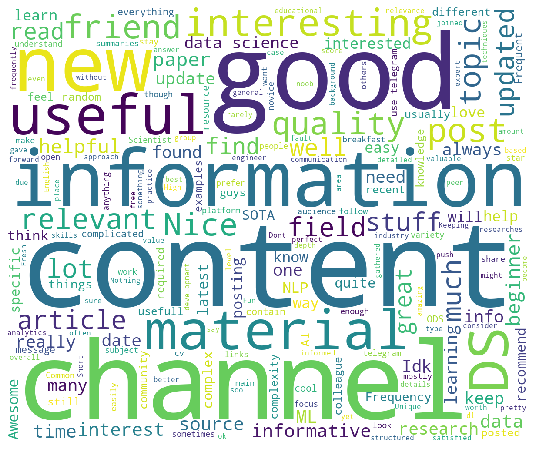

In [69]:
text = ' '.join(df['Score reason'].fillna('').values)
display_wordcloud_image(text)

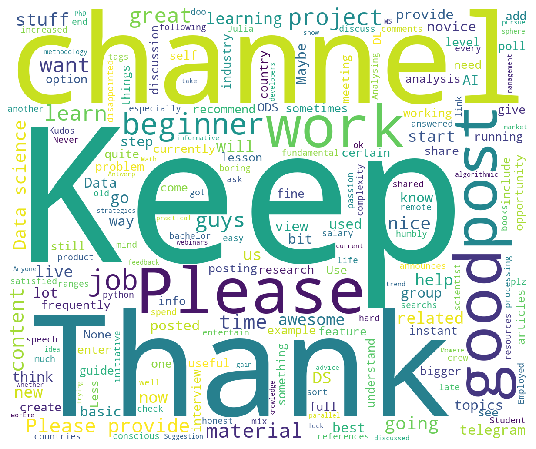

In [70]:
text = ' '.join(df['Comment'].fillna('').values)
display_wordcloud_image(text)

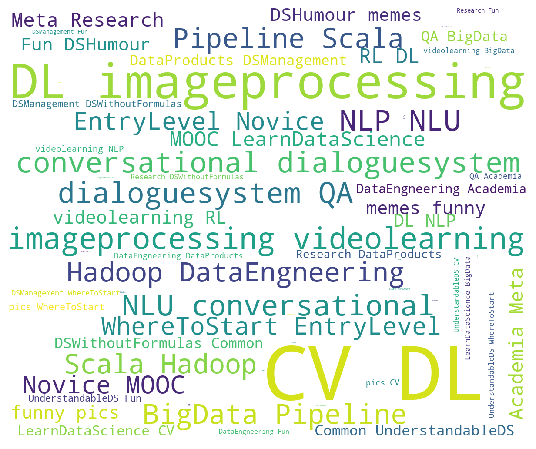

In [71]:
text = ' '.join(
    [i.replace(';', ' ').replace('#', ' ').replace('  ', ' ') for i in df['Fields of interest'].values]
)
display_wordcloud_image(text)